In [1]:
!pwd 


/uufs/chpc.utah.edu/common/home/u1215181/icepack/notebooks/tutorials


In [2]:
import firedrake
import icepack

In [7]:
import geojson

outline_filename = "/uufs/chpc.utah.edu/common/home/u1215181/icepack/ALK_dem/mergedfile.geojson"
with open(outline_filename, "r") as outline_file:
    outline = geojson.load(outline_file)

In [8]:
print(outline["crs"]["properties"]["name"])

urn:ogc:def:crs:OGC:1.3:CRS84


In [9]:
import numpy as np

δ = 50e3
coords = np.array(list(geojson.utils.coords(outline)))
xmin, xmax = coords[:, 0].min() - δ, coords[:, 0].max() + δ
ymin, ymax = coords[:, 1].min() - δ, coords[:, 1].max() + δ

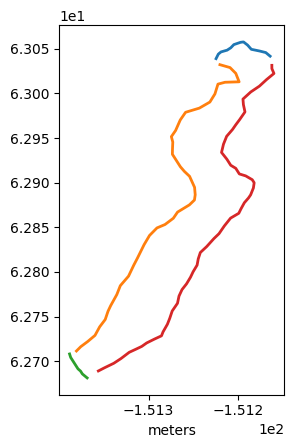

In [10]:
import icepack.plot

fig, axes = icepack.plot.subplots()

for feature in outline["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        axes.plot(xs[:, 0], xs[:, 1], linewidth=2)

axes.set_xlabel("meters");

In [11]:
geometry = icepack.meshing.collection_to_geo(outline)

In [12]:
with open("index.geo", "w") as geo_file:
    geo_file.write(geometry.get_code())

In [13]:
!gmsh -2 -format msh2 -v 2 -o index.msh index.geo

In [14]:
mesh = firedrake.Mesh("index.msh")

Q = firedrake.FunctionSpace(mesh, "CG", 2)
V = firedrake.VectorFunctionSpace(mesh, "CG", 2)

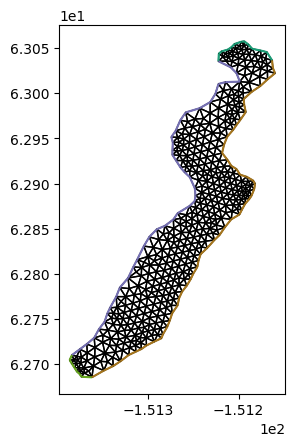

In [15]:
fig, axes = icepack.plot.subplots()
firedrake.triplot(mesh, axes=axes)
#axes.legend()